#### Problem Statement: 
The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

#### DATA DICTIONARY:
-----------------------
System measures used:

lread - Reads (transfers per second ) between system memory and user memory \
lwrite - writes (transfers per second) between system memory and user memory \
scall - Number of system calls of all types per second \
sread - Number of system read calls per second .\
swrite - Number of system write calls per second .\
fork - Number of system fork calls per second.\
exec - Number of system exec calls per second.\
rchar - Number of characters transferred per second by system read calls\
wchar - Number of characters transfreed per second by system write calls\
pgout - Number of page out requests per second\
ppgout - Number of pages, paged out per second\
pgfree - Number of pages per second placed on the free list.\
pgscan - Number of pages checked if they can be freed per second\
atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second\
pgin - Number of page-in requests per second\
ppgin - Number of pages paged in per second\
pflt - Number of page faults caused by protection errors (copy-on-writes).\
vflt - Number of page faults caused by address translation .\
runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.\
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)\
freemem - Number of memory pages available to user processes\
freeswap - Number of disk blocks available for page swapping.

In [80]:
# Data manupulation 
import numpy as np
import pandas as pd
#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
%matplotlib inline
from plotly.subplots import make_subplots
# Pre Processing
from sklearn.impute import SimpleImputer  # (*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Metric and scoring library
from sklearn import metrics

# To build linear regression_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math


# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Others
from warnings import filterwarnings
filterwarnings("ignore")

In [81]:
df=pd.read_excel('compactiv.xlsx')

In [82]:
# checking data set with Top 5 values
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [83]:
# checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [84]:
df.tail()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83
8191,2,0,985,55,46,1.6,4.80,111111.0,22256.0,0.00,...,0.00,0.2,3.40,6.20,91.80,110.00,CPU_Bound,659,1756514,94


Insights: \
1.The dataset has spreat in 8192 entries with 22 variable columns.\
2.The dataset containing THREE Data types of varibales, Int64 8 in numbers,float is maximum ie 13 in count whereas 
only 01 object is there. \
3.In very first look the missing data are seems in 'rchar' and 'wchar' columns which also peeping through top 5 value analysis.

In [85]:
# Shape of Data
df.shape

(8192, 22)

#### DATA PREPROCESSING

In [86]:
# Detrmining unique values for Numerical variables
unique_counts = []
for col in df.columns:
    unique_counts.append((col, df[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/8192*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

wchar: 7925: 96.74%
rchar: 7898: 96.41%
freeswap: 7658: 93.48%
scall: 4115: 50.23%
vflt: 3799: 46.37%
freemem: 3165: 38.64%
pflt: 2987: 36.46%
pgscan: 1202: 14.67%
ppgin: 1072: 13.09%
pgfree: 1070: 13.06%
pgin: 832: 10.16%
sread: 794: 9.69%
ppgout: 774: 9.45%
swrite: 640: 7.81%
pgout: 404: 4.93%
exec: 386: 4.71%
atch: 253: 3.09%
lread: 235: 2.87%
fork: 228: 2.78%
lwrite: 189: 2.31%
usr: 56: 0.68%
runqsz: 2: 0.02%


Insight:\
There are only few 2 unique are present in runqsz which is lowest in dataset.Where as the highest unique value in wchar. 

In [87]:
#unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




### Exploreatory Data Analysis

In [88]:
# Statistical summary of dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lread,8192.0,NaN,NaN,NaN,19.559692,53.353799,0.0,2.0,7.0,20.0,1845.0
lwrite,8192.0,NaN,NaN,NaN,13.106201,29.891726,0.0,0.0,1.0,10.0,575.0
scall,8192.0,NaN,NaN,NaN,2306.318237,1633.617322,109.0,1012.0,2051.5,3317.25,12493.0
sread,8192.0,NaN,NaN,NaN,210.47998,198.980146,6.0,86.0,166.0,279.0,5318.0
swrite,8192.0,NaN,NaN,NaN,150.058228,160.47898,7.0,63.0,117.0,185.0,5456.0
fork,8192.0,NaN,NaN,NaN,1.884554,2.479493,0.0,0.4,0.8,2.2,20.12
exec,8192.0,NaN,NaN,NaN,2.791998,5.212456,0.0,0.2,1.2,2.8,59.56
rchar,8088.0,NaN,NaN,NaN,197385.728363,239837.493526,278.0,34091.5,125473.5,267828.75,2526649.0
wchar,8177.0,NaN,NaN,NaN,95902.992785,140841.707911,1498.0,22916.0,46619.0,106101.0,1801623.0
pgout,8192.0,NaN,NaN,NaN,2.285317,5.307038,0.0,0.0,0.0,2.4,81.44


Insights:
Exept the 'usr' all cases having Mean are higher than the Median hence data is seems Right skewed. which further will reveal clear after visualisation individually.\
In most of variable the data giving idea of presence of outliers because the gap in mean and max value is very high.

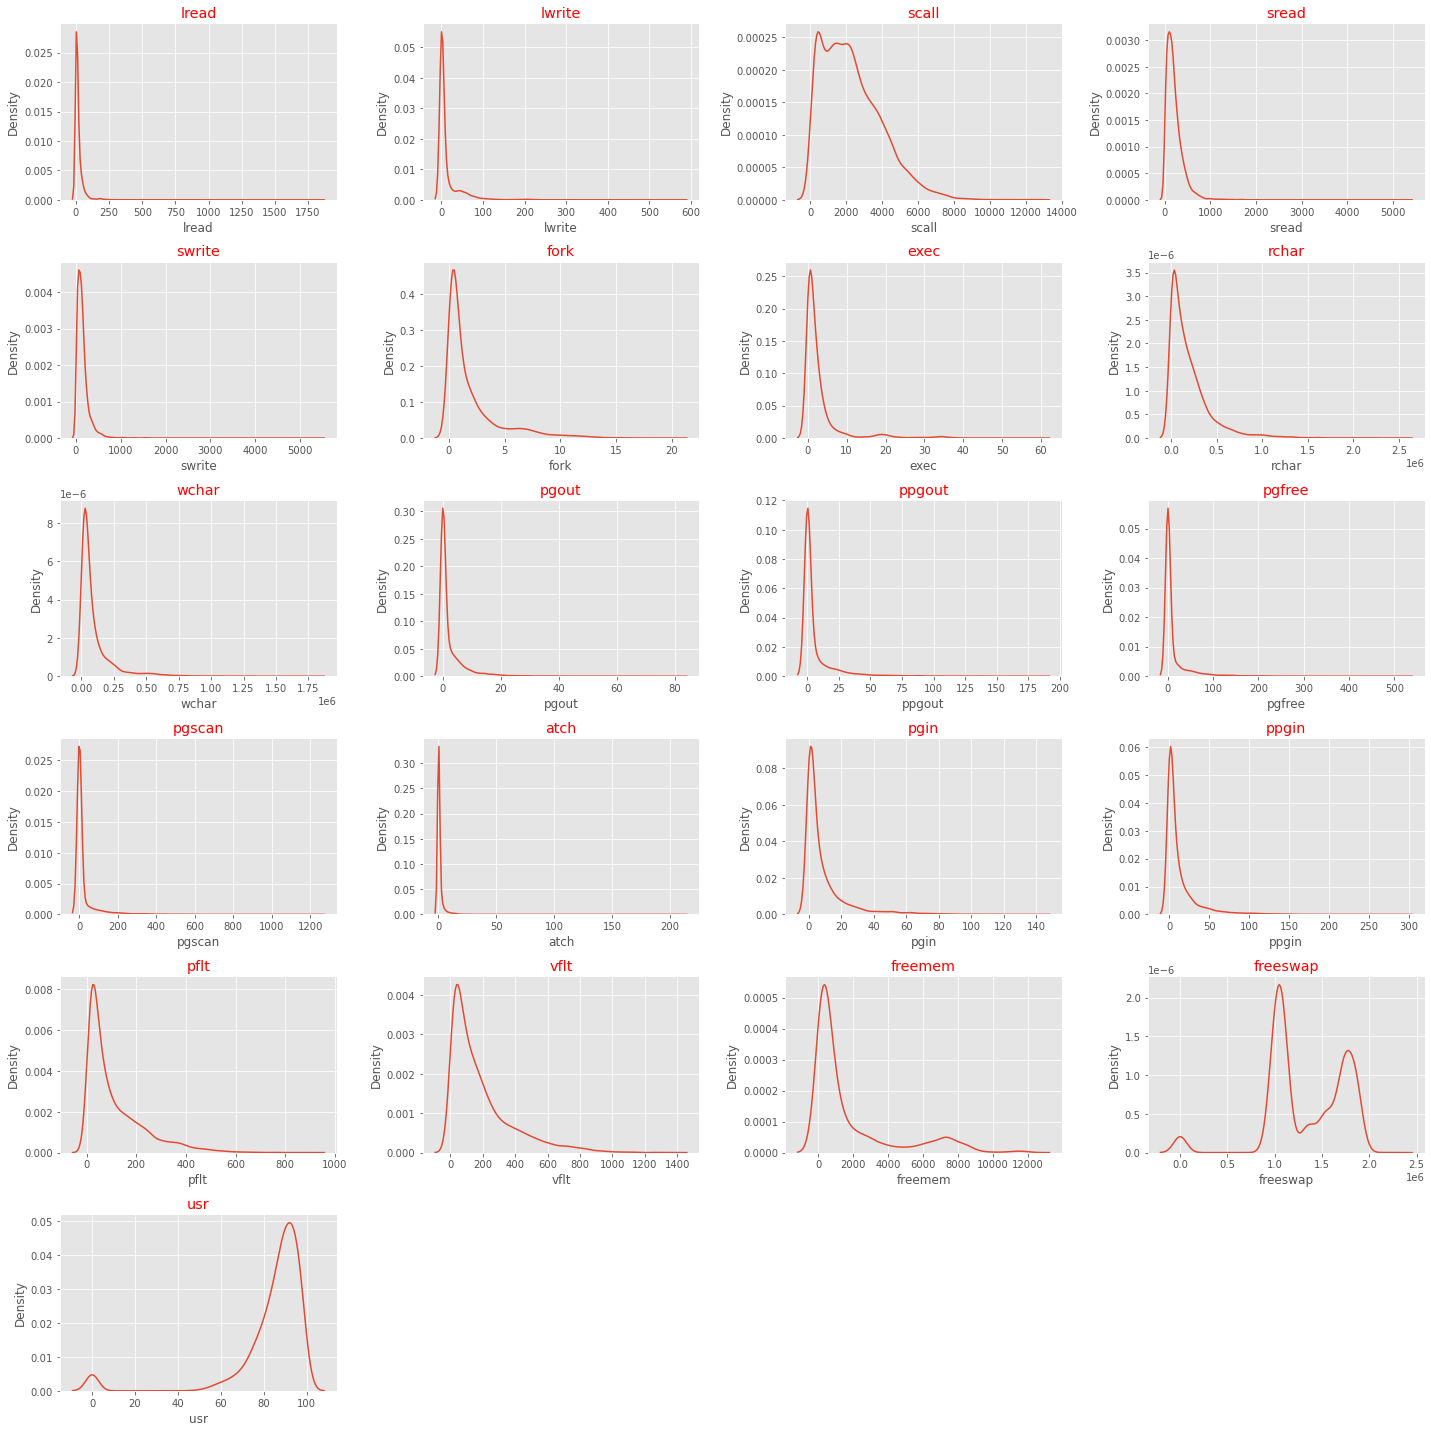

In [92]:
#Data Distribution of each variable
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

##### Univariate Analysis
Univariate analysis is the simplest kind of data analysis in the field of statistics. This could be either descriptive or inferential in nature. The key thing about the univariate analysis is that there is only one data involved here. While the univariate analysis may be easy to analyze and also is not complex.

IndexError: index 12 is out of bounds for axis 0 with size 12

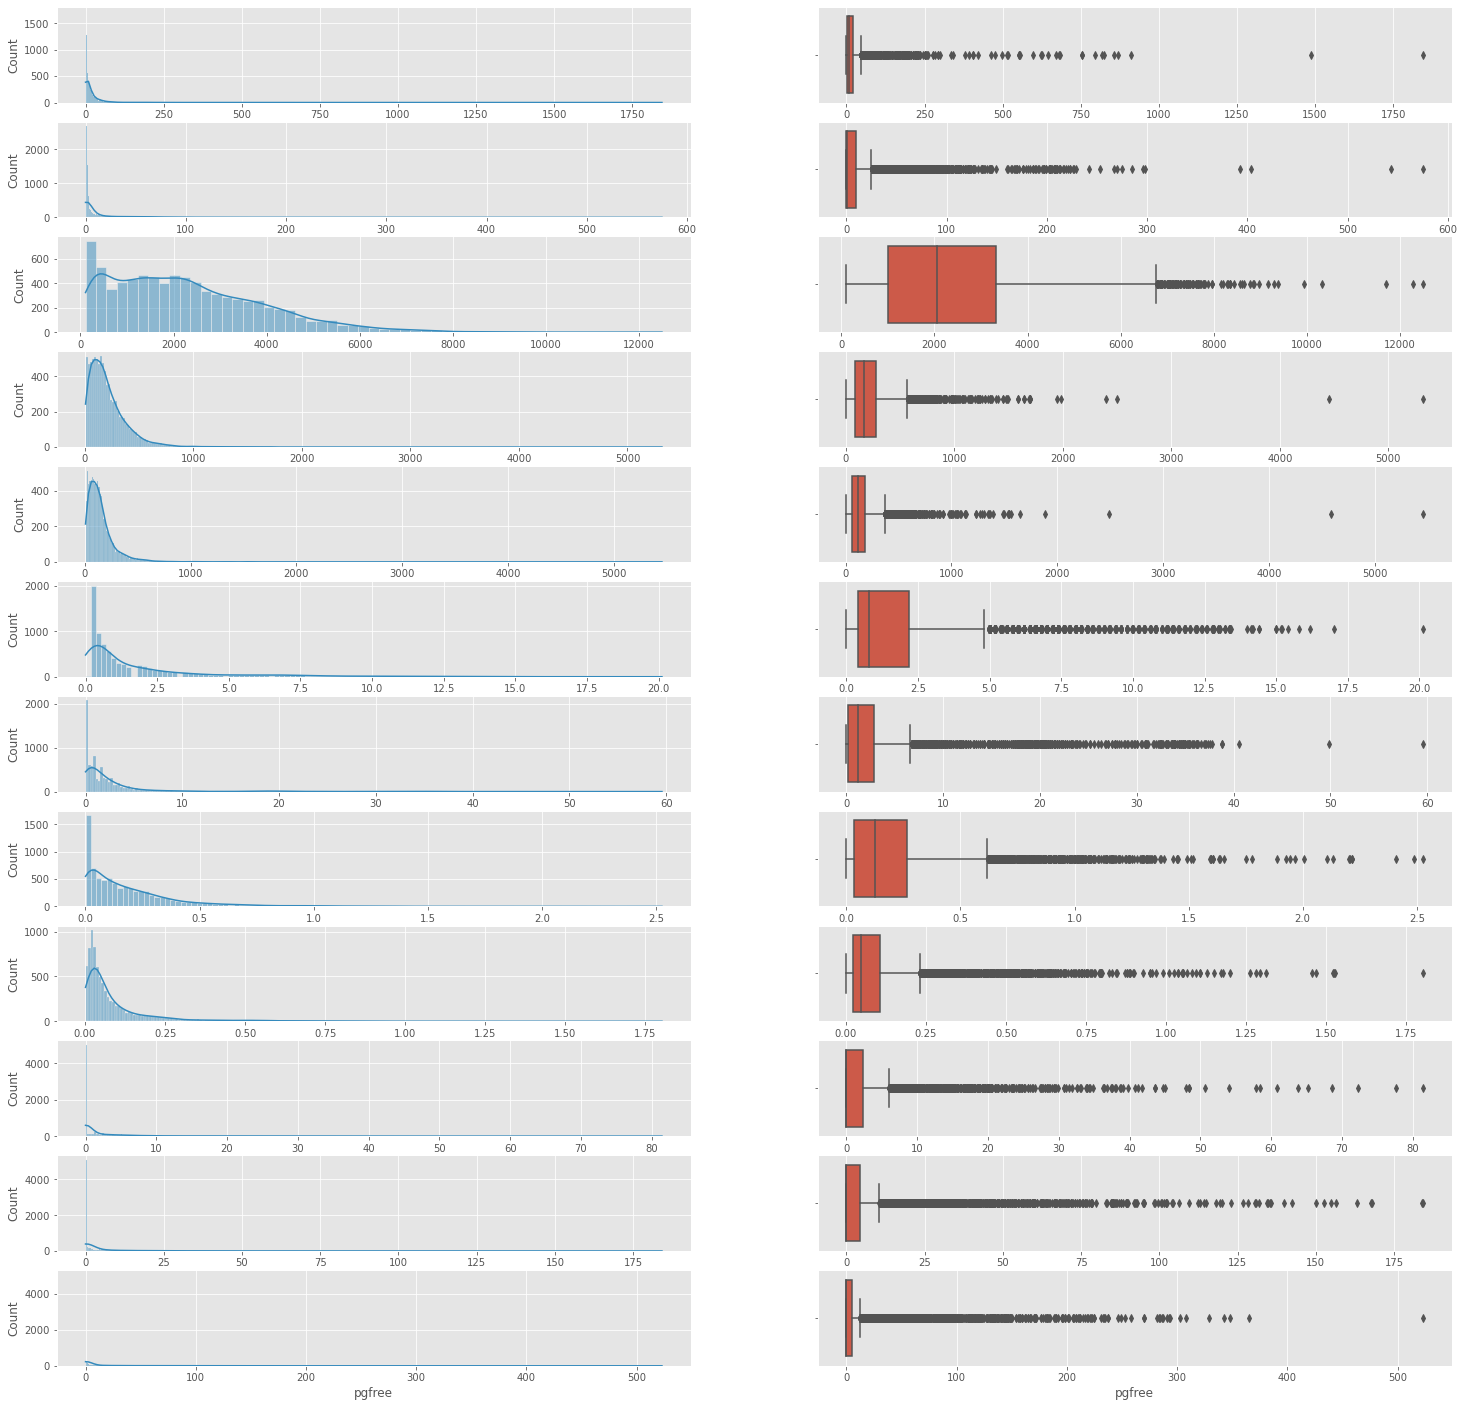

In [93]:
# Univariate Analysis
dfnum=df.select_dtypes(["int64","float64"])
fig, ax= plt.subplots(12,2, figsize=(25,25))
i=0
j=0
for col in dfnum.columns:
    sns.histplot(x=dfnum[col], ax=ax[i][j], kde=True)
    sns.boxplot(x=dfnum[col], ax=ax[i][j+1])
    i=i+1
  

Insights:\
Measurement of Central Tendecy: The data set is following a trend of right skewness except in usr which is left skewed with presence of the large number of outliers\
Measurment of Dispersion : The variables like fork,pgout,ppgout,pgfree,pgscan,atch has NO datapoint till 50% ,Where as The variables like lwrite and exec up to 25%  there are No point data.While In variable like lread,lwrite,fork,exec,pgout,ppgout,pgfree,pgscan,atch, pgin,ppgin,pflt,usr the minimum numbers are zero.


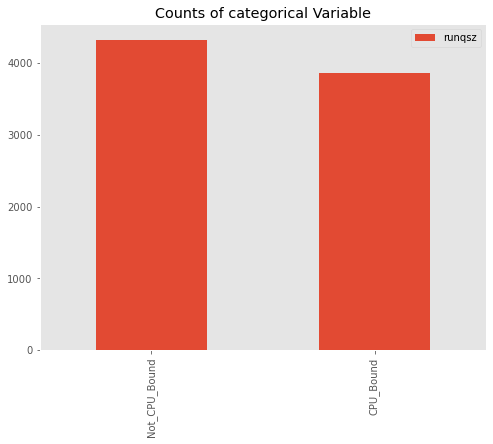

In [94]:
#Univariate Analysis categorical
plt.figure(figsize=(8,6))
df["runqsz"].value_counts().plot(kind='bar')
plt.legend()
plt.title('Counts of categorical Variable')
plt.grid()

Insight:
Frequecy of Ditribution :Only one categorical variable are present and both having less gap with each other in numbers.

In [95]:
dfnum.max().sort_values()

fork             20.12
exec             59.56
pgout            81.44
usr              99.00
pgin            141.20
ppgout          184.20
atch            211.58
ppgin           292.61
pgfree          523.00
lwrite          575.00
pflt            899.80
pgscan         1237.00
vflt           1365.00
lread          1845.00
sread          5318.00
swrite         5456.00
freemem       12027.00
scall         12493.00
wchar       1801623.00
freeswap    2243187.00
rchar       2526649.00
dtype: float64

#### Bivariate Analysis
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

In [ ]:
# Bivariate Analysis : Regression line to the  graph to get a better picture
sns.pairplot(data = dfnum, kind='reg', diag_kind = 'kde')
plt.show()


Insight:\
Although we can say that there exists some relationship between variables, we can't tell quantify that from the above graphs.
So, let's quantify the amounts of correlation using Pearson Correlation and verify the above observations
All types of relationship can be observed among variables.
Most of variable have negative relationship with usr,freeswap and freemem, while remains are seems in positive relatonship.

#### Multivariate Analysis
Multivariate analysis encompasses all statistical techniques that are used to analyze more than two variables at once. The aim is to find patterns and correlations between several variables simultaneously—allowing for a much deeper, more complex understanding of a given scenario than you’ll get with bivariate analysis.

In [96]:
corr=df.corr()

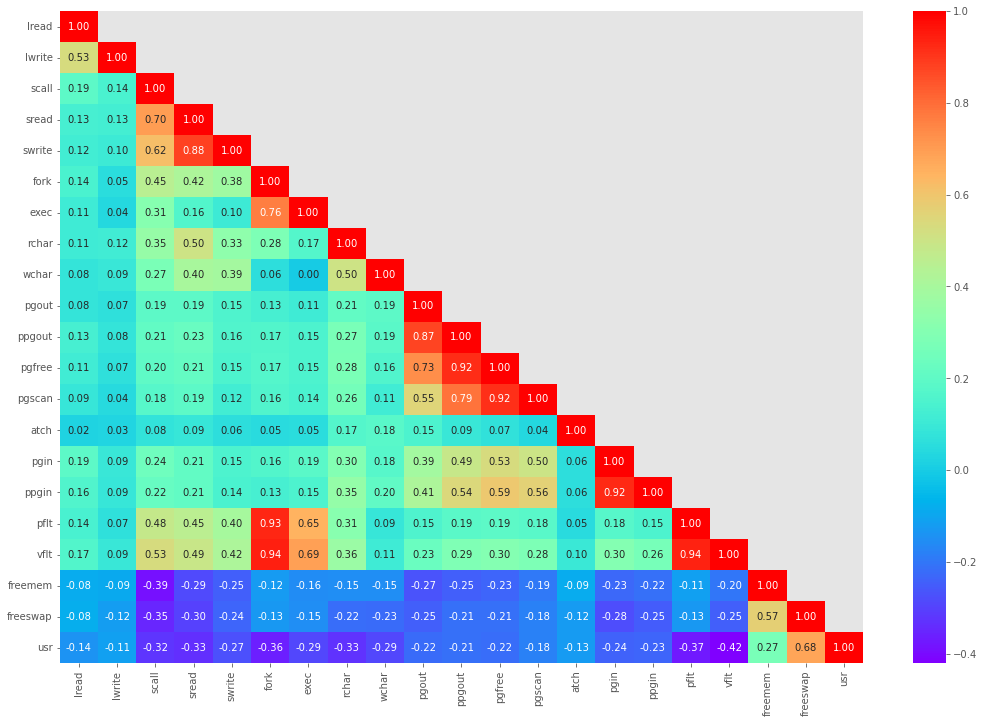

In [97]:
# Multivariate Analysis
plt.figure(figsize=(18,12))
sns.heatmap(df.iloc[:,0:22].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:22].corr(),+1))
plt.show()


Insight:
There is large correlation are found in data set among variables.We are considering high correlation those variables are having more than 0.5% of relationship.
While some variables are having very hard relationship among them in more than 0.79% to 0.94%.
0.03% is minimum postive correation while -0.39% is lowest among all variables.
So the overall data varuiabkes are under strong relationship.

###### Null Value  and its Imputation

In [98]:
#Detection of value which is equals to ZERO and its percentage
for col in df.columns:
    if (df[col]==0).sum()>=0:
        print(f"{col}: {(df[col]==0).sum()}: {round((df[col]==0).mean()*100,2)}%")

lread: 675: 8.24%
lwrite: 2684: 32.76%
scall: 0: 0.0%
sread: 0: 0.0%
swrite: 0: 0.0%
fork: 21: 0.26%
exec: 21: 0.26%
rchar: 0: 0.0%
wchar: 0: 0.0%
pgout: 4878: 59.55%
ppgout: 4878: 59.55%
pgfree: 4869: 59.44%
pgscan: 6448: 78.71%
atch: 4575: 55.85%
pgin: 1220: 14.89%
ppgin: 1220: 14.89%
pflt: 3: 0.04%
vflt: 0: 0.0%
runqsz: 0: 0.0%
freemem: 0: 0.0%
freeswap: 0: 0.0%
usr: 283: 3.45%


Insight: \
Large number of Zero value are present in data varaiables. Where as its highest inpgscan 6448 out of 8192 ie 78.7%.Only 7 varibales are there which has NIL zero values.
The Zero values are seems fine but the final decision on its relevance ban be better revealed in consulataion with concerened vertical expert.

In [99]:
#Detection of Missing value and its percentage
for col in df.columns:
    if df[col].isnull().sum()>=0:
        print(f"{col}: {df[col].isnull().sum()}: {round(df[col].isnull().mean()*100,2)}%")

lread: 0: 0.0%
lwrite: 0: 0.0%
scall: 0: 0.0%
sread: 0: 0.0%
swrite: 0: 0.0%
fork: 0: 0.0%
exec: 0: 0.0%
rchar: 104: 1.27%
wchar: 15: 0.18%
pgout: 0: 0.0%
ppgout: 0: 0.0%
pgfree: 0: 0.0%
pgscan: 0: 0.0%
atch: 0: 0.0%
pgin: 0: 0.0%
ppgin: 0: 0.0%
pflt: 0: 0.0%
vflt: 0: 0.0%
runqsz: 0: 0.0%
freemem: 0: 0.0%
freeswap: 0: 0.0%
usr: 0: 0.0%


The missing values are from Number of characters transferred per second by system read calls(104) and Number of characters transferred per second by system write calls(15),which seems not by fault but have some authenticity. So will Impute this.

In [100]:
#First we are going to Impute the actual NULL values with median
#Imputing the missing values with median
dfnum=df[df.isnull().sum()[df.isnull().sum()>0].index].select_dtypes("float64")

for col in dfnum.columns:
    df[col]=df[col].fillna(df[col].median())

Imputing the missing values with Median becase the data are left skewed and median is less than mean due to presence of large number of outleir data points.The concerned with transfer of data per second.

In [101]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

##### Possibility of creating new features 

We can check the MULTICOLONARITY of data and will see the result in light of Zero values also.The large number of values are present in large number of variables(except 7 nos).If we find the strong correlatiuon than we will go for dropping of variable for further analysis.

<Figure size 1296x864 with 0 Axes>

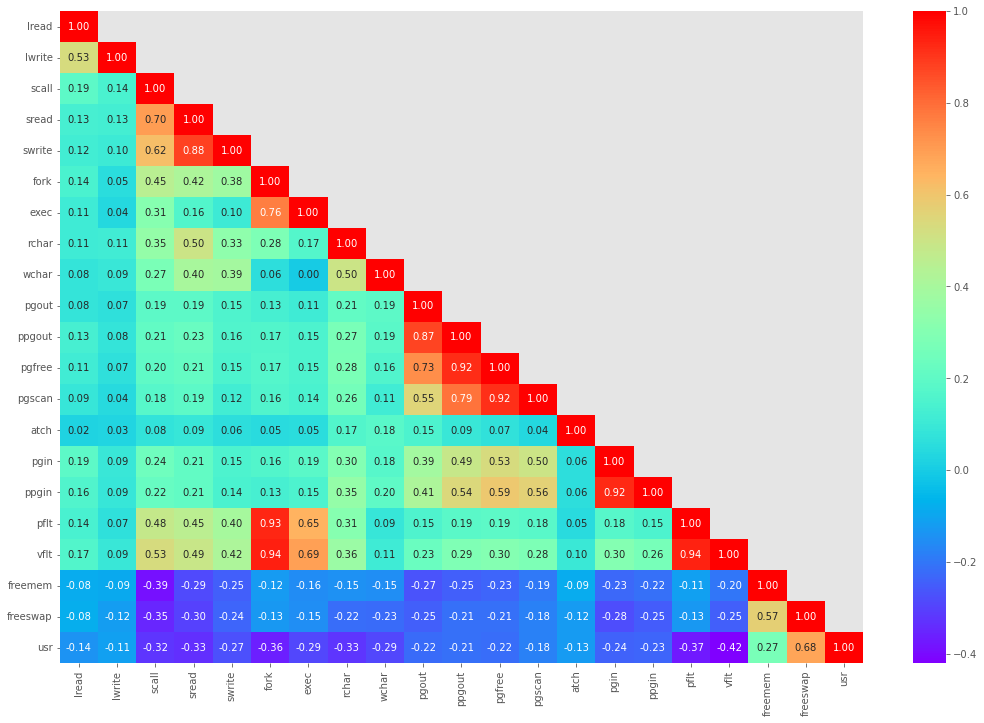

In [102]:
corr=df.corr()
plt.figure(figsize=(18,12))

plt.figure(figsize=(18,12))
sns.heatmap(df.iloc[:,0:22].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:22].corr(),+1))
plt.show();

There is strong relation ship that multicolonarity seems among the those variables also which has high number of Zero values.
So we decided to go for deletion of some as per correlation grid.

In [103]:
df=df.drop(labels=['vflt','pgout','ppgout', 'pgscan', 'ppgin','swrite','scall','fork', 'pflt'],axis=1)
df.head()

,lread,lwrite,sread,exec,rchar,wchar,pgfree,atch,pgin,runqsz,freemem,freeswap,usr
0,1,0,79,0.2,40671.0,53995.0,0.0,0.0,1.6,CPU_Bound,4670,1730946,95
1,0,0,18,0.2,448.0,8385.0,0.0,0.0,0.0,Not_CPU_Bound,7278,1869002,97
2,15,3,159,2.4,125473.5,31950.0,0.0,1.2,6.0,Not_CPU_Bound,702,1021237,87
3,0,0,12,0.2,125473.5,8670.0,0.0,0.0,0.2,Not_CPU_Bound,7248,1863704,98
4,5,1,39,0.4,125473.5,12185.0,0.0,0.0,1.0,Not_CPU_Bound,633,1760253,90


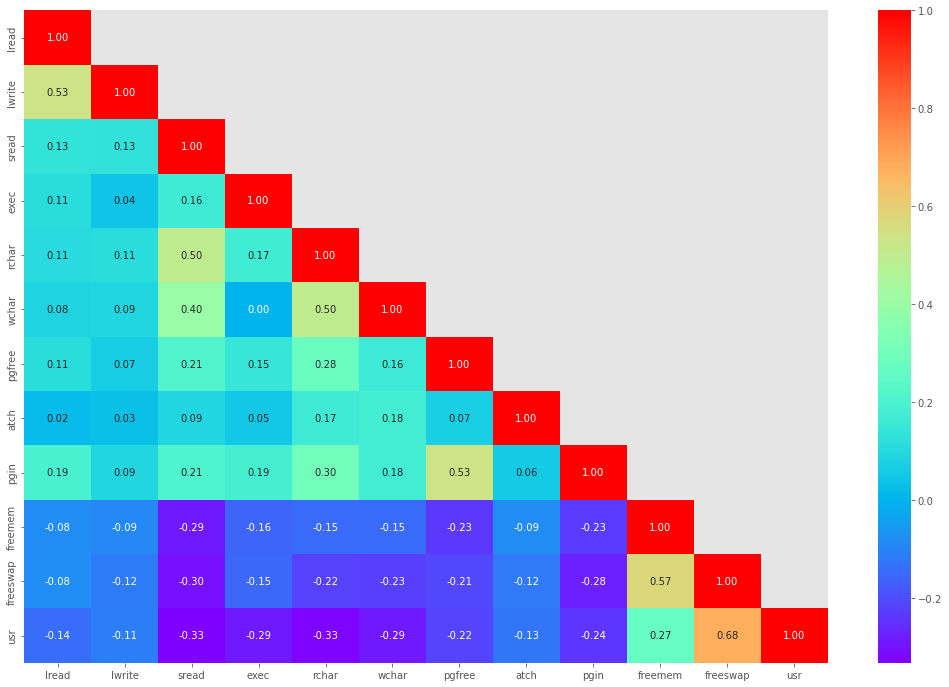

In [104]:
#checking correlation plot for multi collinearity check
corr=df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(df.iloc[:,0:22].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:22].corr(),+1))
plt.show()

In [105]:
#Detection of value which is equals to ZERO and its percentage
for col in df.columns:
    if (df[col]==0).sum()>=0:
        print(f"{col}: {(df[col]==0).sum()}: {round((df[col]==0).mean()*100,2)}%")

lread: 675: 8.24%
lwrite: 2684: 32.76%
sread: 0: 0.0%
exec: 21: 0.26%
rchar: 0: 0.0%
wchar: 0: 0.0%
pgfree: 4869: 59.44%
atch: 4575: 55.85%
pgin: 1220: 14.89%
runqsz: 0: 0.0%
freemem: 0: 0.0%
freeswap: 0: 0.0%
usr: 283: 3.45%


We will carry these Zero values as it is for further analysis.

#### Checking Duplicated Values

In [106]:
# Checking duplicate values
print('The number of duplicated values are :', df.duplicated().sum())

The number of duplicated values are : 0


##### Outlier Detection and its Treatment

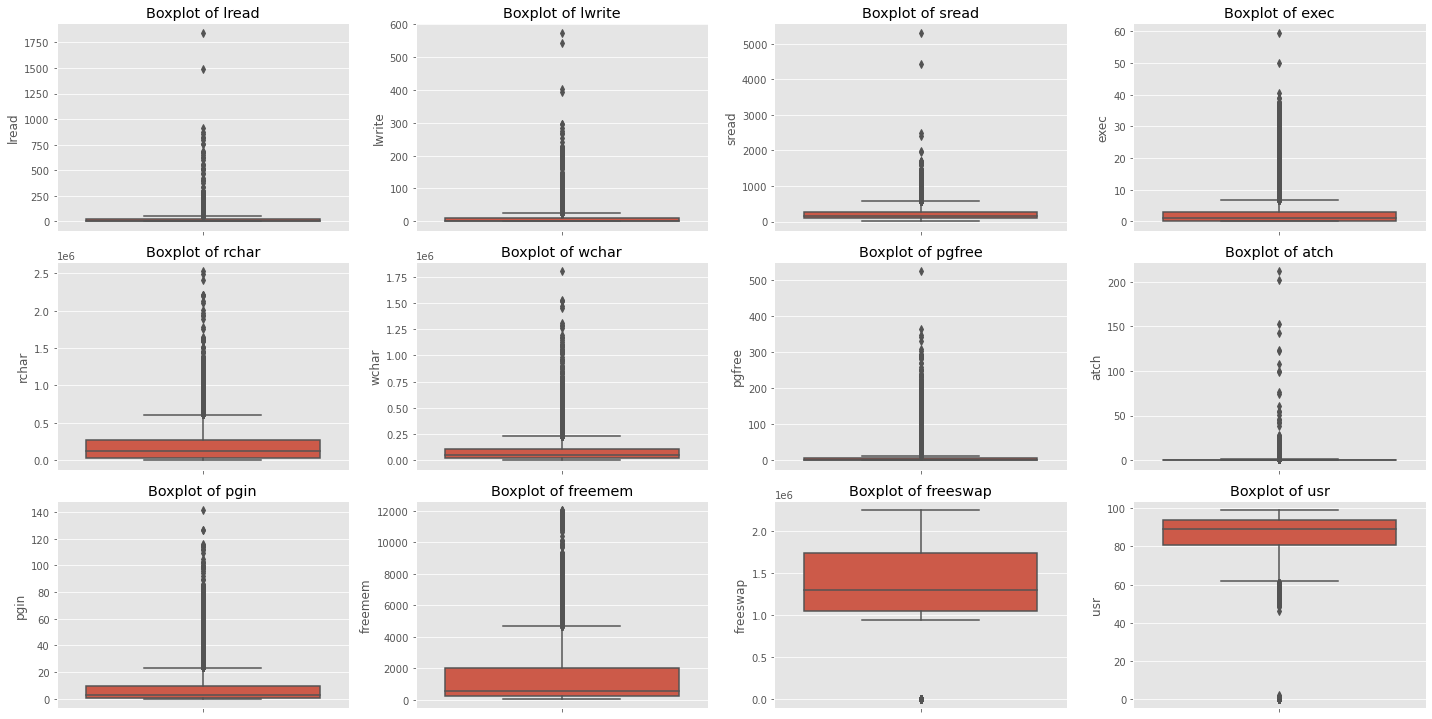

In [107]:
# Outlier Detection
dfnum=df.select_dtypes(["int64","float64"])
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Right from begining the varaibles were showing the sign of Outliers which are now well visible by box plot method.
We have tom perform the linear regression analysis so the treatment of outliers are required.

In [108]:
# Treatment of Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [109]:
for column in dfnum.columns:
    lr,ur=remove_outlier(dfnum[column])
    dfnum[column]=np.where(dfnum[column]>ur,ur,dfnum[column])
    dfnum[column]=np.where(dfnum[column]<lr,lr,dfnum[column])

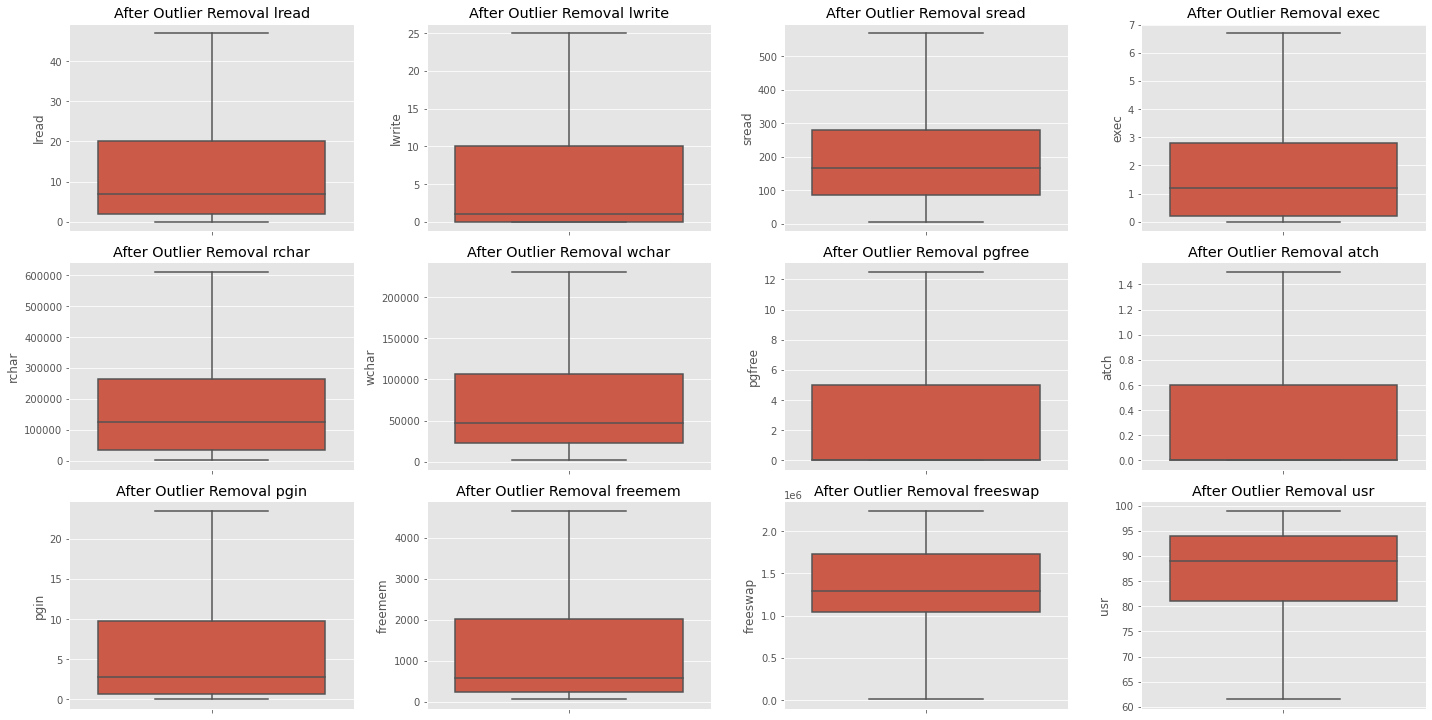

In [110]:
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('After Outlier Removal {}'.format(feature_list[i]))
    plt.tight_layout()

To treat the outliers in the data, we can create a user defined function (UDF) to calculate the lower range and upper range of the data in a particular column. Once detected, the values below lower range can be replaced by the lower range value, and the values above the upper range can be replaced by the upper range value, of the specific column. This will ensure that the data does not have outliers. The outliers can also be eliminated from the dataset, but this will depend on the share of the outliers in the data, and also a discussion with the business team. In this case, we will proceed with the former approach i.e., replacing the outlier values by the lower range and upper range values, however applicable.

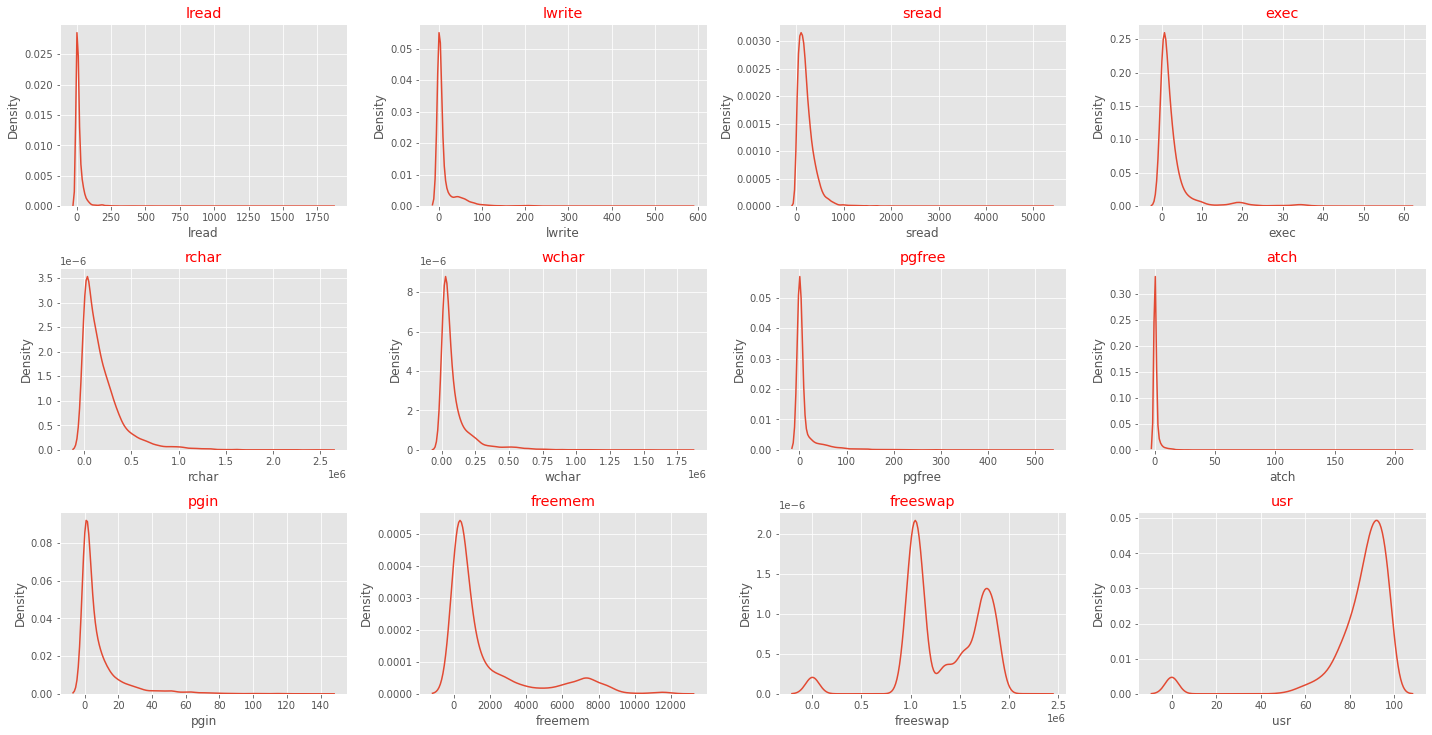

In [111]:
#Data Distribution of each variable after feature engineering
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

#### Encoding the data by Create Dummy Variables

In [112]:
# drop_first=True will drop one of the two runqsz -The number of kernel threads in memory that are waiting for a CPU to run.
df = pd.get_dummies(df, columns=["runqsz"], drop_first=True)
df.head()

,lread,lwrite,sread,exec,rchar,wchar,pgfree,atch,pgin,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,79,0.2,40671.0,53995.0,0.0,0.0,1.6,4670,1730946,95,0
1,0,0,18,0.2,448.0,8385.0,0.0,0.0,0.0,7278,1869002,97,1
2,15,3,159,2.4,125473.5,31950.0,0.0,1.2,6.0,702,1021237,87,1
3,0,0,12,0.2,125473.5,8670.0,0.0,0.0,0.2,7248,1863704,98,1
4,5,1,39,0.4,125473.5,12185.0,0.0,0.0,1.0,633,1760253,90,1


#### Extracting the target column into separate vectors for training set and test set

In [113]:
#### Spliting of data into train and test
# independent variables
X = df.drop("usr", axis=1)
# dependent variable
y = df.pop("usr")

X.head()

,lread,lwrite,sread,exec,rchar,wchar,pgfree,atch,pgin,freemem,freeswap,runqsz_Not_CPU_Bound
0,1,0,79,0.2,40671.0,53995.0,0.0,0.0,1.6,4670,1730946,0
1,0,0,18,0.2,448.0,8385.0,0.0,0.0,0.0,7278,1869002,1
2,15,3,159,2.4,125473.5,31950.0,0.0,1.2,6.0,702,1021237,1
3,0,0,12,0.2,125473.5,8670.0,0.0,0.0,0.2,7248,1863704,1
4,5,1,39,0.4,125473.5,12185.0,0.0,0.0,1.0,633,1760253,1


In [114]:
# let's add the intercept to data
X = sm.add_constant(X)

#### Splitting data into training and test into 70:30 ratio


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("shape of train :", X_train.shape,y_train.shape)
print("shape of test :", X_test.shape,y_test.shape)

shape of train : (5734, 13) (5734,)
shape of test : (2458, 13) (2458,)


In [116]:
X_train.head()

,const,lread,lwrite,sread,exec,rchar,wchar,pgfree,atch,pgin,freemem,freeswap,runqsz_Not_CPU_Bound
694,1.0,1,1,223,0.6,198703.0,293578.0,23.40,2.60,3.80,121,1375446,0
5535,1.0,1,1,87,0.2,7163.0,24842.0,0.00,0.00,1.60,1476,1021541,1
4244,1.0,49,71,225,0.4,83246.0,53705.0,7.19,2.79,3.99,82,18,0
2472,1.0,13,8,300,3.0,96009.0,70467.0,0.00,0.00,2.80,772,993909,0
7052,1.0,17,23,13,1.6,17132.0,12514.0,0.00,0.00,0.00,4179,1821682,1


In [117]:
X_test.head()

,const,lread,lwrite,sread,exec,rchar,wchar,pgfree,atch,pgin,freemem,freeswap,runqsz_Not_CPU_Bound
3894,1.0,27,39,53,0.2,26592.0,54394.0,0.0,0.0,0.4,7762,1875466,1
4276,1.0,1,0,85,0.4,16667.0,36431.0,0.0,0.0,1.0,2979,1010114,1
3414,1.0,9,7,247,0.4,14513.0,61905.0,30.4,10.4,14.8,89,11,0
4165,1.0,32,4,182,5.6,337517.0,94832.0,1.0,1.4,4.6,1300,1535309,0
7385,1.0,16,3,259,1.4,73537.0,237547.0,0.0,0.0,5.6,2114,988600,0


In [118]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',5734+2458)

X_train (5734, 13)
X_test (2458, 13)
y_train (5734,)
y_test (2458,)
Total Obs 8192


##### Linear Regression Model

In [119]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [120]:
list(enumerate(X_train.columns))

[(0, 'const'),
 (1, 'lread'),
 (2, 'lwrite'),
 (3, 'sread'),
 (4, 'exec'),
 (5, 'rchar'),
 (6, 'wchar'),
 (7, 'pgfree'),
 (8, 'atch'),
 (9, 'pgin'),
 (10, 'freemem'),
 (11, 'freeswap'),
 (12, 'runqsz_Not_CPU_Bound')]

In [121]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name , regression_model.coef_[idx]))
     

The coefficient for const is 0.0
The coefficient for lread is -0.021770426250442922
The coefficient for lwrite is 0.011991026779689886
The coefficient for sread is -0.004635783924150994
The coefficient for exec is -0.6590513352461455
The coefficient for rchar is -5.32436563818823e-06
The coefficient for wchar is -1.0327712182192639e-05
The coefficient for pgfree is -0.0388663412523446
The coefficient for atch is -0.06403975116432621
The coefficient for pgin is 0.057328201948089415
The coefficient for freemem is -0.001823048783988082
The coefficient for freeswap is 3.083293653151787e-05
The coefficient for runqsz_Not_CPU_Bound is 7.678482792501638


Insight:\
The negative regression estimation coefficient is interpreted as the two variables tested having opposite associations.  Referring to the case study example above, the negative estimated selling price coefficient indicates that \
the selling price (X) variable affects the bread sales variable (Y) in a negative direction.

In [122]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 47.29879439245825


In [123]:
# R square on training data
regression_model.score(X_train, y_train)

0.6067705563673178

In [124]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.6067705563673178


In [125]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.5944574745330722


In [126]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 12.158125825519342


##### Check Multi-collinearity using VIF (States Model)

In [127]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [128]:
i=0
for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1

const ---> 21.327010675421555
lread ---> 1.4546044692142015
lwrite ---> 1.4197924758091527
sread ---> 1.5101083050920125
exec ---> 1.0960449836534474
rchar ---> 1.6957841057160048
wchar ---> 1.4518010919102635
pgfree ---> 1.4555576899765845
atch ---> 1.0517465662176666
pgin ---> 1.5354544063851836
freemem ---> 1.5916788887512348
freeswap ---> 1.6188621116139021
runqsz_Not_CPU_Bound ---> 1.0763928904314977


#### Using Statsmodels OLS

In [151]:
# This adds the constant term beta0 to the Simple Linear Regression.
#X_con=sm.add_constant(X)
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [153]:
#Make the linear model using OLS
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     735.6
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:38:51   Log-Likelihood:                -22063.
No. Observations:                5734   AIC:                         4.415e+04
Df Residuals:                    5721   BIC:                         4.424e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.2988      0.707     66.859      0.000      45.912      48.686
lread                   -0.0218      0.003     -6.603      0.000      -0.028      -0.015
lwrite                   0.0120      0.006      1.906      0.057      -0.000       0.024
sread                   -0.0046      0.001     -5.157      0.000      -0.006      -0.003
exec                    -0.6591      0.030    -21.977      0.000      -0.718      -0.600
rchar                -5.324e-06   8.02e-07     -6.638      0.000    -6.9e-06   -3.75e-06
wchar                -1.033e-05   1.28e-06     -8.064      0.000   -1.28e-05   -7.82e-06
pgfree                  -0.0389      0.006     -6.822      0.000      -0.050      -0.028
atch                    -0.0640      0.027     -2.335      0.020      -0.118      -0.010
pgin                     0.0573      0.014      4.216      0.000       0.031       0.084
freemem                 -0.0018   7.71e-05    -23.656      0.000      -0.002      -0.002
freeswap              3.083e-05   4.59e-07     67.236      0.000    2.99e-05    3.17e-05
runqsz_Not_CPU_Bound     7.6785      0.313     24.550      0.000       7.065       8.292
==============================================================================
Omnibus:                     1560.795   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4674.555
Skew:                          -1.404   Prob(JB):                         0.00
Kurtosis:                       6.417   Cond. No.                     6.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 the value of sig. .000 indicates that the p-value <0.05, so it can be concluded that the selling price (X) has a significant effect on bread sales (Y) with a negative sign.

In [132]:
X_train1=X_train.drop(['lwrite'],axis=1)


In [154]:
model1 = sm.OLS(y_train,X_train1).fit()
print("R-squard:",np.round(model1.rsquared,3))
print("Adjusted R-Squared:",np.round(model1.rsquared_adj,3))

R-squard: 0.607
Adjusted R-Squared: 0.606


In [161]:
model1 = sm.OLS(y_train,X_train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     801.8
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:44:16   Log-Likelihood:                -22065.
No. Observations:                5734   AIC:                         4.415e+04
Df Residuals:                    5722   BIC:                         4.423e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.4815      0.701     67.726      0.000      46.107      48.856
lread                   -0.0186      0.003     -6.539      0.000      -0.024      -0.013
sread                   -0.0046      0.001     -5.108      0.000      -0.006      -0.003
exec                    -0.6609      0.030    -22.043      0.000      -0.720      -0.602
rchar                -5.278e-06   8.02e-07     -6.582      0.000   -6.85e-06   -3.71e-06
wchar                 -1.03e-05   1.28e-06     -8.041      0.000   -1.28e-05   -7.79e-06
pgfree                  -0.0387      0.006     -6.794      0.000      -0.050      -0.028
atch                    -0.0644      0.027     -2.348      0.019      -0.118      -0.011
pgin                     0.0559      0.014      4.117      0.000       0.029       0.083
freemem                 -0.0018   7.71e-05    -23.660      0.000      -0.002      -0.002
freeswap              3.077e-05   4.57e-07     67.274      0.000    2.99e-05    3.17e-05
runqsz_Not_CPU_Bound     7.6672      0.313     24.513      0.000       7.054       8.280
==============================================================================
Omnibus:                     1564.648   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4698.714
Skew:                          -1.407   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                     6.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [136]:
i=0
for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1

const ---> 21.327010675421555
lread ---> 1.4546044692142015
lwrite ---> 1.4197924758091527
sread ---> 1.5101083050920125
exec ---> 1.0960449836534474
rchar ---> 1.6957841057160048
wchar ---> 1.4518010919102635
pgfree ---> 1.4555576899765845
atch ---> 1.0517465662176666
pgin ---> 1.5354544063851836
freemem ---> 1.5916788887512348
freeswap ---> 1.6188621116139021
runqsz_Not_CPU_Bound ---> 1.0763928904314977


In [155]:
#Get the value of coefficient of determination
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 60.6771 %


In [156]:
#Get the Predictions on test set
ypred = model.predict(X_test)
print(ypred)

3894     97.474819
4276     79.604101
3414     43.900524
4165     84.442552
7385     68.966800
           ...    
4744    101.919644
6918     82.214915
1556     97.834802
1577     91.464231
453      71.533416
Length: 2458, dtype: float64


In [157]:
#Get the RMSE on training set
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_train,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 11.346088775064992


In [158]:
## Calculating the RMSE values
math.sqrt(np.mean((model.predict(X_train)-y_train)**2))

11.34608877506498

In [159]:
model.predict(X_train)

694      83.100170
5535     83.035689
4244     44.400537
2472     71.903126
7052    102.097053
           ...    
7935     76.064201
5192     98.123877
3980     75.235864
235      82.431169
5157    100.760428
Length: 5734, dtype: float64

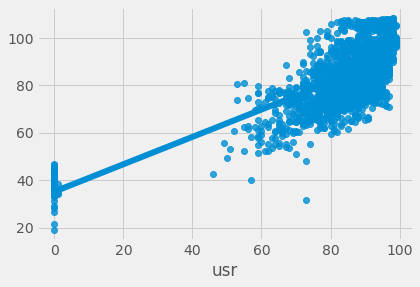

In [160]:
#create scatterplot with regression line
sns.regplot(y_test, ypred)
plt.show()

In [143]:
# Pridiction of linear Regression
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(47.3) * const + (-0.02) * lread + (0.01) * lwrite + (-0.0) * sread + (-0.66) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.04) * pgfree + (-0.06) * atch + (0.06) * pgin + (-0.0) * freemem + (0.0) * freeswap + (7.68) * runqsz_Not_CPU_Bound + 

In [144]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

,R Square Score
Linear,0.587004
Ridge,0.587013
Lasso,0.587004


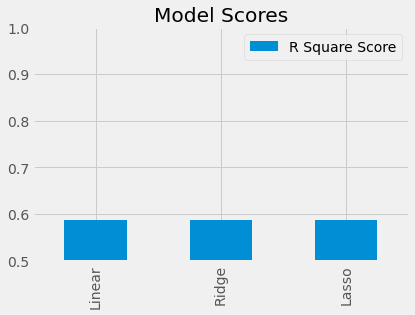

In [162]:
# R2 Score comparision among the different models of regression
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer

def lets_try(X,y):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=1)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X_test, y_test, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf =   LinearRegression()        
    results["Linear"]=test_model(clf)
    
    clf =   Ridge()
    results["Ridge"]=test_model(clf)     
        
    clf =   Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)          
        
        
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    #results=results.sort_values(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X,y)

##### Q-Q plot we will be using scipy’s probplot function where we compare a variable of our chosen to a normal probability.

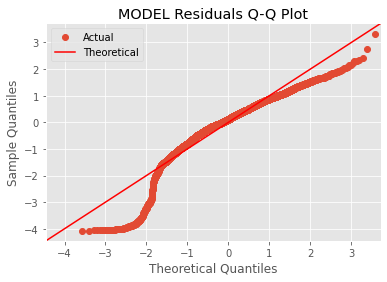

In [146]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show() 

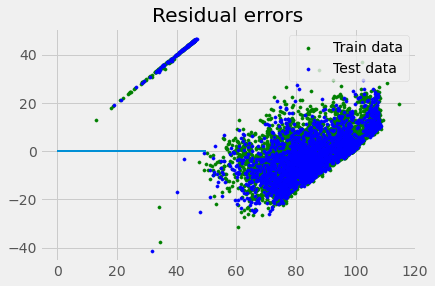

In [147]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

##### Model summary
R-value represents the correlation between the dependent and independent variable. A value greater than 0.4 is taken for further analysis. In this case, the value is .713, which is good.
R-square shows the total variation for the dependent variable that could be explained by the independent variables. A value greater than 0.6 shows that the model is effective enough to determine the relationship. In this case, the value is .607, which is good.
 Adjusted R-square shows the generalization of the results i.e. the variation of the sample results from the population in multiple regression. It is required to have a difference between R-square and Adjusted R-square minimum. In this case, the value is .606, which is not far off from .606, so it is good.
Therefore, the model summary table is satisfactory to proceed with the next step. However, if the values were unsatisfactory, then there is a need for adjusting the data until the desired results are obtained.

Annova Table:
Elements of this table relevant for interpreting the results are:

P-value/ Sig value: Generally, 95% confidence interval or 5% level of the significance level is chosen for the study. Thus the p-value should be less than 0.05. In the above table, it is .000. Therefore, the result is significant.
F-ratio: It represents an improvement in the prediction of the variable by fitting the model after considering the inaccuracy present in the model. A value is greater than 1 for F-ratio yield efficient model. In the above table, the value is 735.6, which is good.
These results estimate that as the p-value of the ANOVA table is below the tolerable significance level, thus there is a possibility of rejecting the null hypothesis in further analysis.
